## Will the candidate accept the offer? Classification Problem- Decision Tree and Random Forest

### About the Data

Here is the description of candidate’s attributes:
1. Candidate – Reference number; it is a unique number to identify the candidate
2. DOJ extended – Binary variable identifying whether candidate asked for date of joining extension (Yes/No)
3. Duration to accept the offer – Number of days taken by the candidate to accept the offer (Scale variable)
4. Notice period – Notice period to be served in the parting company before candidate can join this
company (Scale variable)
5. Offered band – Band offered to the candidate based on experience, performance in interview
rounds (C0/C1/C2/C3/C4/C5/C6)
6. Percentage hike expected – Percentage hike expected by the candidate (Scale variable)
7. Percentage hike offered – Percentage hike offered by the company (Scale variable)
8. Joining bonus – Binary variable indicating if joining bonus was given or not (Yes/no)
9. Gender – Gender of the candidate (Male/Female)
10. Candidate source – Source from which resume of the candidate was obtained (Employee referral/
Agency/ Direct)

Source of the dataset: The dataset is taken from the book "Machine Learning using Python" -by Manaranjan Pradhan and U Dinesh Kumar

### Import the libraries

In [89]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.metrics import plot_confusion_matrix

### Import the dataset

In [90]:
hr_df = pd.read_csv('data/hr_data.csv')
hr_df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


### Get a glimse of the dataset

In [91]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8995 non-null   object 
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   object 
 10  Candidate relocate actual    8995 non-null   object 
 11  Gender                       8995 non-null   object 
 12  Candidate Source             8995 non-null   object 
 13  Rex in Yrs        

Our dataset looks clean. There are no missing values

### Unbalanced data

In [92]:
hr_df.Status.value_counts()

Joined        7313
Not Joined    1682
Name: Status, dtype: int64

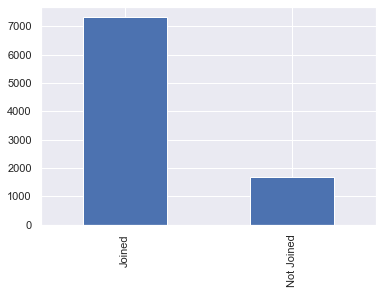

In [93]:
pd.Series(hr_df.Status).value_counts().plot.bar()

There is imbalance ( unequal distribution of classes) in our data. The class "Joined" has approximately 4 times the data as compared to the "Not Joined" class. The issue of imbalance dataset is that our model may be biased towards the class that is overrepresented. In this case-"Joined". 

In [94]:
hr_df.columns

Index(['SLNO', 'Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

### Selecting Features

It is always a good practise to create a variable that contains a list of the features that you think is important. We can always update it as we progress with mutliple models.
In this case, SLNO and Candidate Ref are not of any use to use. Hence we exclude these variables

In [95]:
X_features=['DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age']

### Encoding Categorical Variable

The pd.dummies() method in Pandas is used to encode categorical features and create dummy variable. For example, if we have n categories there should be (n-1) dummy variable (We drop the first parameter using drop_first by setting it to True). If we keep all the n dummy variable, this might lead to multicollinearity issue.

For example, gender in our dataset is repreented by "Male/Female. Therefore, in our dataset, we don't require two variables to determine the Gender. In case the value of the variable is 1, for example, it represents Male else Female



In [96]:
encoded_hr_df = pd.get_dummies( hr_df[X_features],drop_first=True)

In [97]:
list(encoded_hr_df.columns)

['Duration to accept offer',
 'Notice period',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Percent difference CTC',
 'Rex in Yrs',
 'Age',
 'DOJ Extended_Yes',
 'Offered band_E1',
 'Offered band_E2',
 'Offered band_E3',
 'Joining Bonus_Yes',
 'Candidate relocate actual_Yes',
 'Gender_Male',
 'Candidate Source_Direct',
 'Candidate Source_Employee Referral',
 'LOB_BFSI',
 'LOB_CSMP',
 'LOB_EAS',
 'LOB_ERS',
 'LOB_ETS',
 'LOB_Healthcare',
 'LOB_INFRA',
 'LOB_MMS',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Cochin',
 'Location_Gurgaon',
 'Location_Hyderabad',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Noida',
 'Location_Others',
 'Location_Pune']

In [98]:
encoded_hr_df['Gender_Male'].head(5)

0    0
1    1
2    1
3    1
4    1
Name: Gender_Male, dtype: uint8

### Recoding the response varialbe

In [99]:
hr_df.Status.unique()

array(['Joined', 'Not Joined'], dtype=object)

In [100]:

hr_df['Status'] = hr_df['Status'].map({'Joined': 1, 'Not Joined': 0})
hr_df['Status'].head(5)

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

### Assign Dependent and Independent variables

In [101]:
Y=hr_df.Status
X=encoded_hr_df

### Splitting Dataset into Training and Test Sets

In [102]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


X_train and y_train contain the independent variables and response variable values for the training
dataset respectively. Similarly, X_test and y_test contain the independent variables and response variable
values for the test dataset, respectively.

In [103]:
X_train.shape

(6296, 34)

In [104]:
y_train.shape

(6296,)

In [105]:
X_test.shape

(2699, 34)

### Unbalanced data (Training)

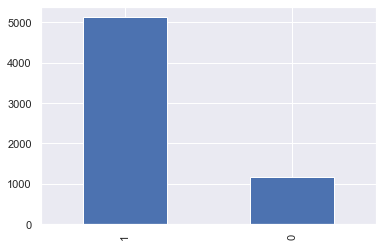

In [106]:
y_train.value_counts().plot.bar()

### Using SMOTE to balance the dataset

One way to deal with the imbalance dataset is to use the SMOTE package. To give a brief introduction, it picks up the instances of  minority class (Not Joined)
and replicates the existing observation in the dataset. In other words, it interpolates the minority class and genderates the training data records also called as oversampling

In [107]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=33)

### New Training set after balancing the data

In [108]:
from sklearn.model_selection import train_test_split

X_train_new,y_train_new=sm.fit_sample(X_train,y_train.ravel())


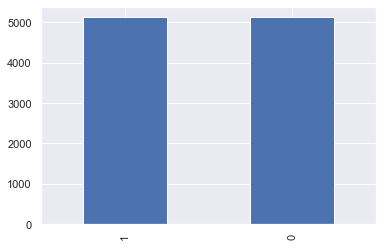

In [109]:
pd.Series(y_train_new).value_counts().plot.bar()

In [110]:
pd.Series(y_train_new).value_counts()

1    5132
0    5132
dtype: int64

Not the instances of both the classes seems to be equally represented in the training data

## Decision Tree

We will use Gini and Entropy techinques as a measure of impurity the Decision Tree classification

### Building Decision Tree Classifier using Gini Criteria

In [111]:
#Build the Decision tree classifer assuming the depth to be 3
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini',max_depth = 3)

In [112]:
clf_tree.fit( X_train_new, y_train_new )

DecisionTreeClassifier(max_depth=3)

### Measuring Test Accuracy

Using the model to predict the probability of those who "Joined" on the test set and obtain ROC AUC score and then accuracy.

In [113]:
from sklearn import metrics
tree_predict = clf_tree.predict_proba( X_test )[:,1]
print(tree_predict)

[0.79136287 1.         0.31013216 ... 0.31013216 1.         0.31013216]


This gives us the probability of a candidate taking up the job offer and joining a company. For example, 0.791 means there is 
79% probability that a person would join the job

### ROC  AUC Curve

ROC and AUC are two important metrics to measure the model performance of the classification problems

In [114]:
## Paremeters of the model
## model: the classification model
## test_X: X features of the test set
## test_y: actual labels of the test set

## Returns

## - ROC Auc Score
## - FPR and TPRs for different threshold values

def draw_roc_curve( model, test_X, test_y ):
    
## Creating and initializing a results DataFrame with actual labels

    test_results_df = pd.DataFrame( { 'actual': test_y } )
    test_results_df = test_results_df.reset_index()

# predict the probabilities on the test set

    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )
## selecting the probabilities that the test example belongs to class 1

    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]

## Invoke roc_curve() to return the fpr, tpr and threshold values.
## threshold values contain values from 0.0 to 1.0

    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual,test_results_df.chd_1,drop_intermediate = False )

## Getting the roc auc score by invoking metrics.roc_auc_score method

    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1 )

## Setting the size of the plot

   # plt.figure(figsize=(12, 6))
    plt.axis('tight')

## plotting the actual fpr and tpr values

    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )

## plotting th diagnoal line from (0,1)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

## Setting labels and titles

    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return auc_score, fpr, tpr, thresholds

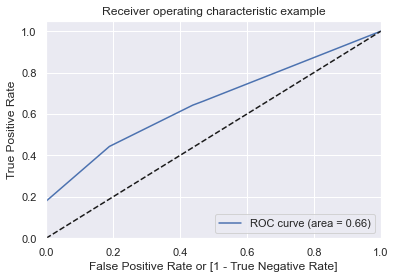

In [115]:
## Invoking draw_roc_curve with the Decision Tree model (Gini Index)
_, _, _, _ = draw_roc_curve( clf_tree, X_test, y_test )

### Confusion Matrix

In [116]:
from sklearn.metrics import plot_confusion_matrix

def draw_cm(model,X_test,y_test):
    
    plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)
    plt.grid(False)
    plt.show()

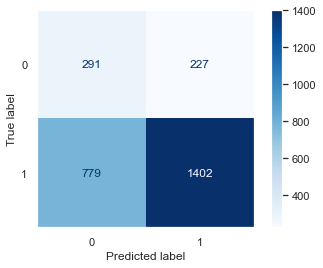

In [117]:
cm = draw_cm(clf_tree, X_test,y_test )

In [118]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, clf_tree.predict(X_test)))

Accuracy: 0.62726935902186


In [119]:
779/(779+1402)

0.35717560751948646

One might get the false semblence that the accuracy of 76% is decent.However that might not be true. Our main objective is to
make sure that those who accepted the offer and joined are really classified as "joined" and those who have not joined be classifed as "not joined".

In this case, 779/(779+1402)= 0.35. That is 779 out of2181 (=779+1402) cases are classifed as "not joined" but in fact they "joined"

In simple words, we are missing around 35% of cases which is huge.

### Displaying the Tree

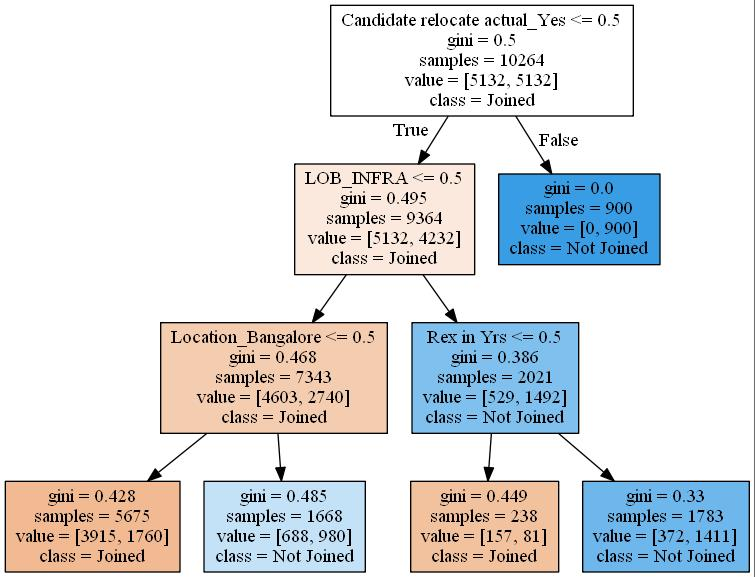

In [120]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
# Export the tree into odt file
export_graphviz( clf_tree,
                out_file = "chd_tree.odt",
                feature_names = X_train_new.columns,
                class_names= ['Joined', 'Not Joined'],
                filled = True)
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )
# Render the png file
Image(filename='chd_tree.png')

### Building Decision Tree using Entropy Criteria

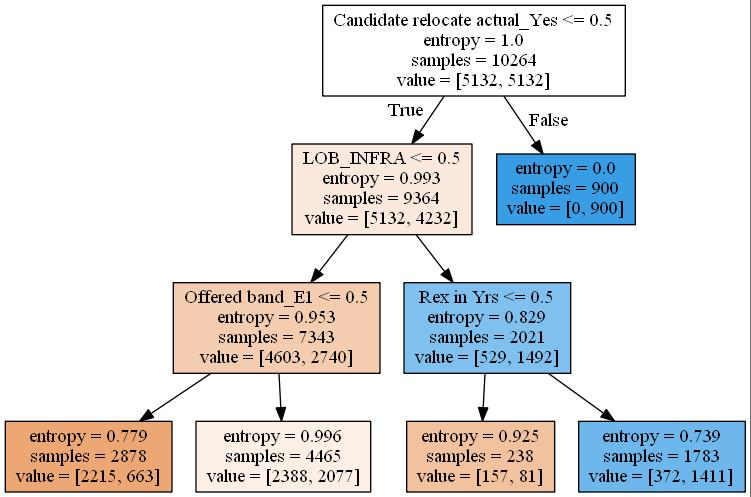

In [121]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy',max_depth = 3 )
clf_tree_entropy.fit( X_train_new, y_train_new )
# Export the tree into odt file
export_graphviz( clf_tree_entropy,out_file = "chd_tree_entropy.odt",feature_names = X_train_new.columns,filled = True )
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree_entropy.odt' )
chd_tree_graph.write_jpg( 'chd_tree_entropy.png' )
# Render the png file
Image(filename='chd_tree_entropy.png')

### Measuring test accuracy AUC (Entropy)

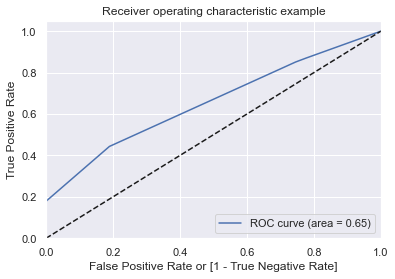

In [122]:
## Invoking draw_roc_curve with the Decision Tree model (Gini Index)
_, _, _, _ = draw_roc_curve( clf_tree_entropy, X_test, y_test )

AUC using Entropy is less than Gini. Hence Gini criteria is working better than entropy in this case. Let's find out what confusion matrix has to say

### Confusion Matrix

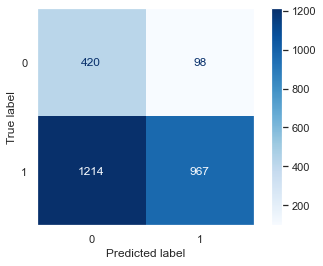

In [123]:
cm = draw_cm(clf_tree_entropy, X_test,y_test )

In [124]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, clf_tree_entropy.predict(X_test)))

Accuracy: 0.513894034827714


In [125]:
1214/(1214+967)

0.5566254011921137

The accuracy of our model has decreased drastically from 62%(Gini) to 56%(Entropy) .Still worse, are missing 55% if the "joined" cases

### Finding Optimal Criteria and Max Depth for Decision Tree

We need to search through various combinations of criteria and tree depths to find optimal criteria and
depth where the tree gives highest accuracy

In [126]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'],'max_depth': range(2,10)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,tuned_parameters,cv=10,scoring='roc_auc')
clf.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [127]:
clf.best_score_

0.899195657114476

In [128]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 9}

Gini criteria seems be work best with a maximum depth of 9 .Let's rebuild the model with the above criteria

### (Re)Building Decision Tree Classifier using Gini Criteria

In [129]:
#Build the Decision tree classifer assuming the depth to be 3
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini',max_depth = 9)

In [130]:
clf_tree.fit( X_train_new, y_train_new )

DecisionTreeClassifier(max_depth=9)

### Measuring Test Accuracy

In [131]:
from sklearn import metrics
tree_predict = clf_tree.predict_proba( X_test )[:,1]
print(tree_predict)

[0.94787645 1.         0.70253165 ... 0.64705882 1.         0.46464646]


### ROC  AUC Curve

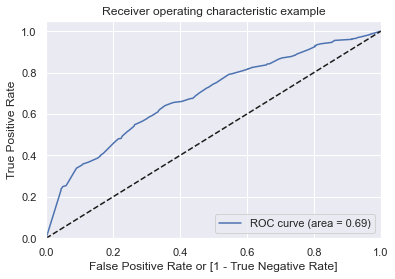

In [132]:
## Invoking draw_roc_curve with the Decision Tree model (Gini Index)
_, _, _, _ = draw_roc_curve( clf_tree, X_test, y_test )

### Confusion Matrix

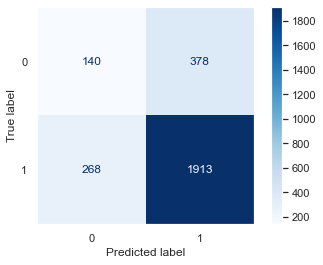

In [133]:
cm = draw_cm(clf_tree, X_test,y_test )

In [134]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, clf_tree.predict(X_test)))

Accuracy: 0.7606520933679141


In [136]:
268/(268+1913)

0.1228794131132508

## Interpretation

1. Out accuracy has increased from 62% (default Gini criteria) to 76% (optimal value)
2. AUC score increased from 0.66 to 0.69
3. We are missing 12% of the cases which is better than our earlier model

## Will Random Forest perform better than Decision Tree?

## Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
# Create an instance of Random Forest with default parameter
rf=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
rf.fit(X_train_new,y_train_new)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Predicting Random Forest

In [139]:
rf_predict=rf.predict_proba(X_test)[:,1]
print(rf_predict)

[1.  1.  0.9 ... 0.9 1.  0.7]


### Measuring Test Accuracy

Using the model to predict the probability of deposited on the test set and obtain ROC AUC score.

### ROC AUC Curve

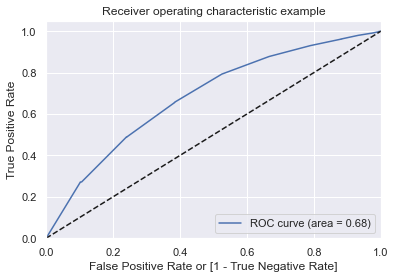

In [140]:
## Invoking draw_roc_curve with the Decision Tree model (Gini Index)
_, _, _, _ = draw_roc_curve( rf, X_test, y_test )

### Confusion Matrix

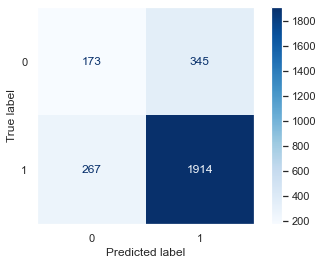

In [141]:
cm = draw_cm(rf, X_test,y_test )

In [142]:
267/(267+1914)

0.12242090784044017

In [143]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf.predict(X_test)))

Accuracy: 0.773249351611708


### Interpretation

1. Our accuracy is 77% which is better than Decision Tree model
2. We are misclassifyin around 12 % of the cases (similar to decision tree)

### Grid Search for Optimal Parameters

In [144]:
## Configuring parameters and values for searched
tuned_parameters = [{'max_depth': [10, 15],'criterion':['gini','entropy'],'n_estimators': [10,20],'max_features': ['sqrt', 'auto']}]
## Initializing the RF classifier
radm_clf = RandomForestClassifier()
## Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,tuned_parameters,cv=5,scoring='roc_auc')
## Fitting the training set
clf.fit(X_train_new, y_train_new )

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 15],
                          'max_features': ['sqrt', 'auto'],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [145]:
clf.best_score_

0.9439757044394887

In [146]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 20}

### (Re)Building Random Forest algorithm after finetuning

In [147]:
rf=RandomForestClassifier(n_estimators=20,criterion="gini",random_state=0,max_depth=15,max_features='sqrt')
rf.fit(X_train_new,y_train_new)

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=20,
                       random_state=0)

### Predicting Random Forest and measuring test accuracy

In [148]:
rf_predict=rf.predict_proba(X_test)[:,1]
print(rf_predict)

[0.99127102 1.         0.84690359 ... 0.82186398 1.         0.63045502]


### ROC AUC Curve

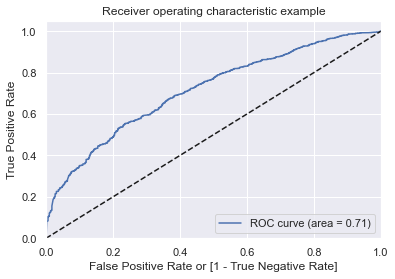

In [151]:
## Invoking draw_roc_curve with the Decision Tree model (Gini Index)
_, _, _, _ = draw_roc_curve( rf, X_test, y_test )

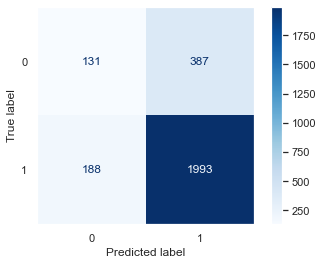

In [153]:
cm = draw_cm(rf, X_test,y_test )

In [154]:
188/(188+1993)

0.08619899128839982

In [155]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf.predict(X_test)))

Accuracy: 0.7869581326417192


### Interpretation

1. Our AUC score has improved from 0.68 to 0.71
2. Accuracy has improved from 77% to 78%
3. Most importantly we are misclassifying only 8 % of the cases as compared to 12% of the cases

### Finding Important Features

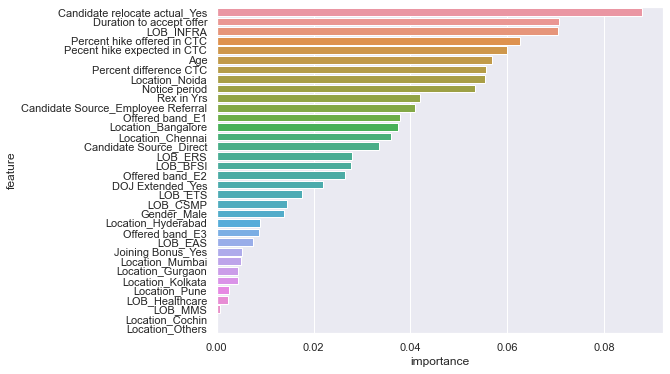

In [156]:
import numpy as np
# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': X_train_new.columns,'importance': rf.feature_importances_ } )
## Sorting the features based on their importances with most important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize=(8, 6))
# plot the values
sns.barplot( y = 'feature', x = 'importance', data = feature_rank );

In [157]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
12,Candidate relocate actual_Yes,0.087804,8.780357
0,Duration to accept offer,0.070639,15.844302
22,LOB_INFRA,0.070545,22.898798
3,Percent hike offered in CTC,0.062703,29.169141
2,Pecent hike expected in CTC,0.059923,35.161467
6,Age,0.056779,40.839387
4,Percent difference CTC,0.055679,46.407291
31,Location_Noida,0.055491,51.956381
1,Notice period,0.053308,57.287213
5,Rex in Yrs,0.042072,61.494376
